## SUPERVISED VALIDATION OF CLUSTERING RESULTS

#### 1. Importem les llibreries 

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

### K-MEANS

In [3]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, delimiter=',')
    return dataset

# Carreguem el nostre dataset
df = load_dataset('df_km.csv')

In [4]:
df

,Unnamed: 0,X,VABC,ECCEN,FMF,VAdjMat,fragC,Zagreb,PPSA.1,PPSA.2,...,OB_MW,MLogP,THSA,TPSA,RPSA,OB_MR,OB_logP,OB_TPSA,id,cluster
0,1,1,-0.869784,-0.853246,-0.609754,-0.594201,-0.909780,-0.784205,-0.968527,-0.583394,...,-0.661052,-1.276779,-1.561998,1.453664,2.044182,-0.995808,-0.876590,0.614863,DB00114,2
1,2,2,0.897586,1.404467,-0.002475,0.832240,0.414087,0.836450,0.493307,1.459919,...,0.869122,-0.465456,-0.050625,2.179174,1.072990,0.924543,-0.655559,2.139853,DB00116,1
2,3,3,-1.448035,-1.110454,-0.488738,-1.303273,-1.015941,-1.324424,-1.080586,-0.890128,...,-1.370913,-1.141559,-1.436102,0.143904,1.051983,-1.451951,-1.068514,-0.010239,DB00117,3
3,4,4,0.267110,0.361347,-0.263995,0.531225,0.153821,0.450580,0.006674,0.790522,...,0.506488,-0.871118,-0.563636,1.615130,1.157397,0.225564,-1.932724,2.125467,DB00118,2
4,5,5,-1.894922,-1.344799,-2.061943,-2.795353,-1.189704,-1.864642,-1.811886,-1.267936,...,-1.888662,-1.276779,-2.100912,0.281758,2.358739,-1.997455,-1.239848,-0.686954,DB00119,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9207,9208,9209,0.249275,0.195591,0.899383,0.595381,0.382798,0.527754,0.999505,0.486682,...,0.352012,-0.059795,0.645237,-0.250256,-0.449639,0.359739,0.147727,-0.440042,DB16733,4
9208,9209,9210,-0.267403,-0.167358,-0.026031,0.250354,-0.737471,0.141884,-1.204902,-0.673161,...,0.149922,-0.735897,0.150493,-0.290510,-0.335388,-0.520898,0.625334,-0.673466,DB16734,2
9209,9210,9211,0.283185,0.344199,0.595025,0.595381,-0.170427,0.566341,-0.284816,0.152241,...,0.513450,-0.195015,0.143710,0.312766,0.070556,0.152825,0.236401,-0.069944,DB16735,2
9210,9211,9212,1.358610,0.361347,-0.536411,0.832240,1.413626,1.029385,1.081605,0.300252,...,1.074803,1.698072,1.361996,-0.539426,-0.773073,1.441310,2.297956,-0.450292,DB16739,5


In [5]:
X=df.drop(['Unnamed: 0','cluster','id','X'],axis=1) #totes les dades exepte el tipus
y=df['cluster'] #El tipus, que és la nostre variable objectiu

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.92


In [8]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.96


<IPython.core.display.Javascript object>


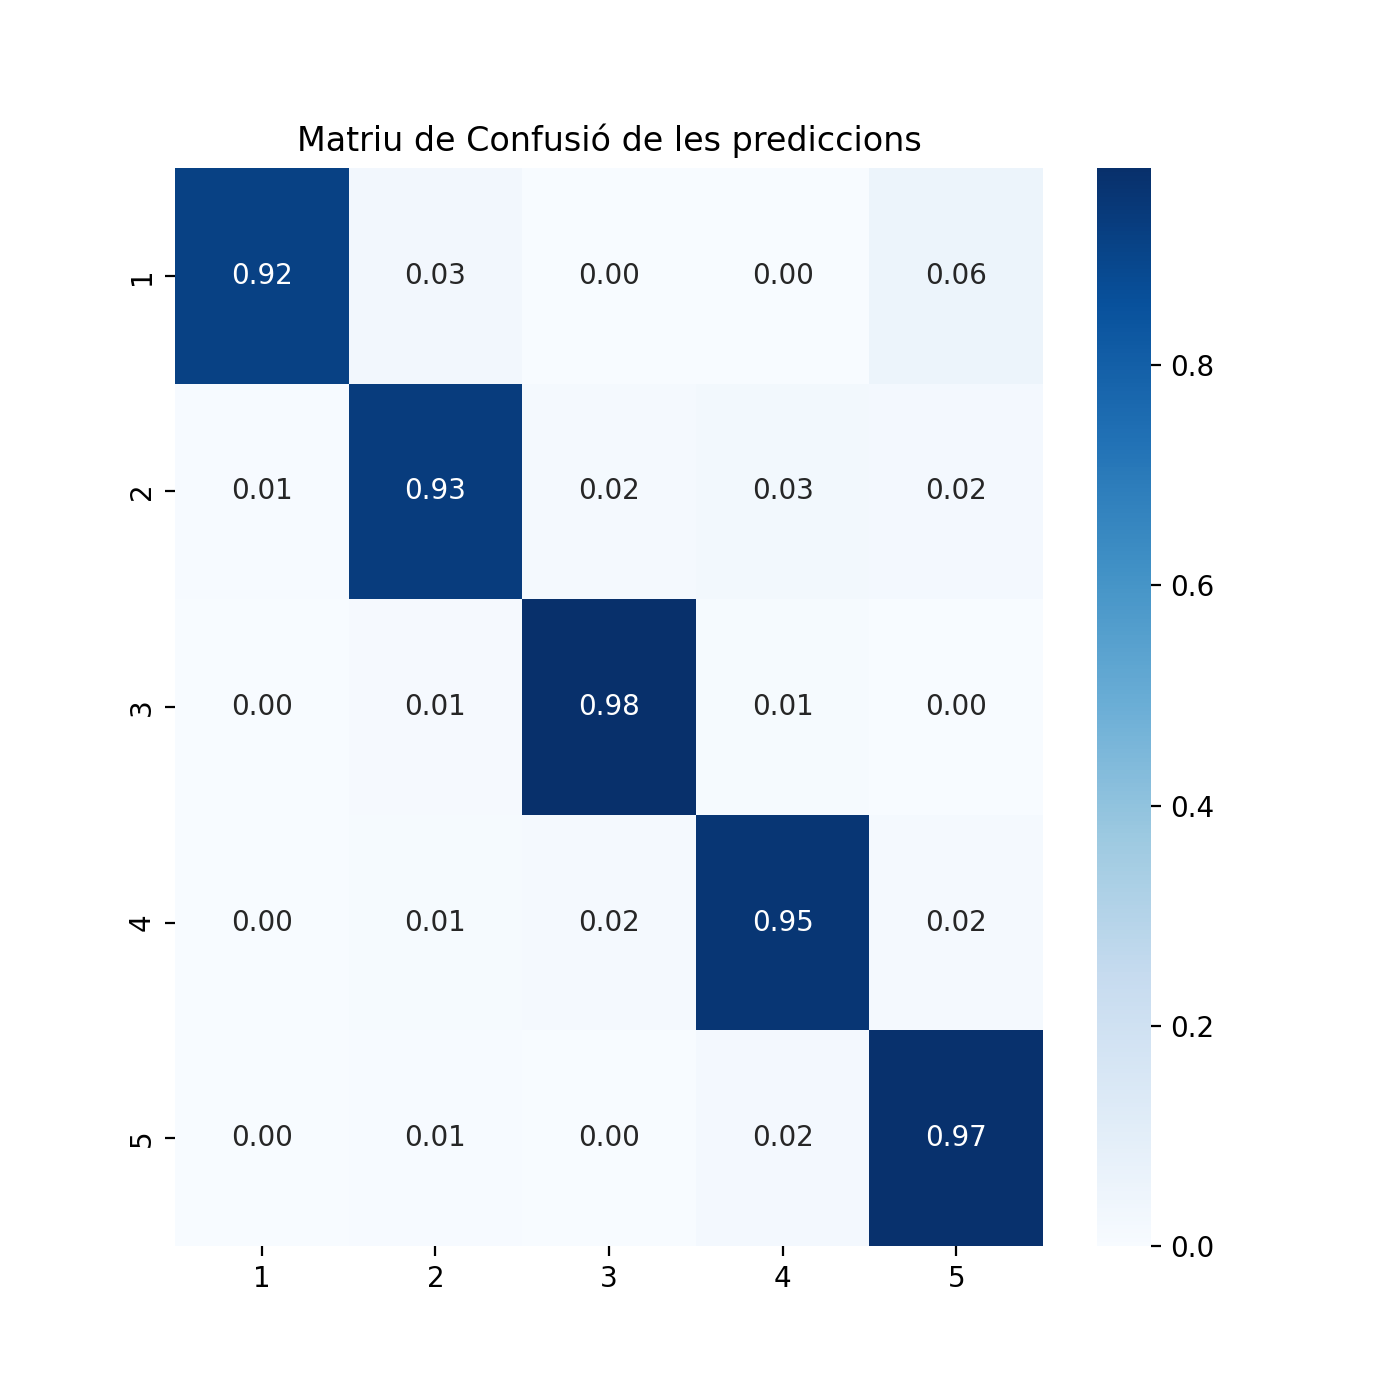

In [9]:
class_names = np.array(['1', '2', '3', '4', '5'])
plt.figure(figsize=(7,7))
y_pred = RF.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm =confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Matriu de Confusió de les prediccions')
plt.show()
plt.savefig('validation_KM.png')

### Hierarchical Clustering

In [17]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, delimiter=',')
    return dataset

# Carreguem el nostre dataset
df_hc = load_dataset('df_hc.csv')

In [18]:
df_hc

,Unnamed: 0,X,VABC,ECCEN,FMF,VAdjMat,fragC,Zagreb,PPSA.1,PPSA.2,...,OB_MW,MLogP,THSA,TPSA,RPSA,OB_MR,OB_logP,OB_TPSA,id,cluster
0,1,1,-0.869784,-0.853246,-0.609754,-0.594201,-0.909780,-0.784205,-0.968527,-0.583394,...,-0.661052,-1.276779,-1.561998,1.453664,2.044182,-0.995808,-0.876590,0.614863,DB00114,1
1,2,2,0.897586,1.404467,-0.002475,0.832240,0.414087,0.836450,0.493307,1.459919,...,0.869122,-0.465456,-0.050625,2.179174,1.072990,0.924543,-0.655559,2.139853,DB00116,1
2,3,3,-1.448035,-1.110454,-0.488738,-1.303273,-1.015941,-1.324424,-1.080586,-0.890128,...,-1.370913,-1.141559,-1.436102,0.143904,1.051983,-1.451951,-1.068514,-0.010239,DB00117,2
3,4,4,0.267110,0.361347,-0.263995,0.531225,0.153821,0.450580,0.006674,0.790522,...,0.506488,-0.871118,-0.563636,1.615130,1.157397,0.225564,-1.932724,2.125467,DB00118,1
4,5,5,-1.894922,-1.344799,-2.061943,-2.795353,-1.189704,-1.864642,-1.811886,-1.267936,...,-1.888662,-1.276779,-2.100912,0.281758,2.358739,-1.997455,-1.239848,-0.686954,DB00119,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9207,9208,9209,0.249275,0.195591,0.899383,0.595381,0.382798,0.527754,0.999505,0.486682,...,0.352012,-0.059795,0.645237,-0.250256,-0.449639,0.359739,0.147727,-0.440042,DB16733,3
9208,9209,9210,-0.267403,-0.167358,-0.026031,0.250354,-0.737471,0.141884,-1.204902,-0.673161,...,0.149922,-0.735897,0.150493,-0.290510,-0.335388,-0.520898,0.625334,-0.673466,DB16734,3
9209,9210,9211,0.283185,0.344199,0.595025,0.595381,-0.170427,0.566341,-0.284816,0.152241,...,0.513450,-0.195015,0.143710,0.312766,0.070556,0.152825,0.236401,-0.069944,DB16735,3
9210,9211,9212,1.358610,0.361347,-0.536411,0.832240,1.413626,1.029385,1.081605,0.300252,...,1.074803,1.698072,1.361996,-0.539426,-0.773073,1.441310,2.297956,-0.450292,DB16739,3


In [19]:
X=df_hc.drop(['Unnamed: 0','cluster','id','X'],axis=1) #totes les dades exepte el tipus
y=df_hc['cluster'] #El tipus, que és la nostre variable objectiu

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.96


In [22]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.98


<IPython.core.display.Javascript object>


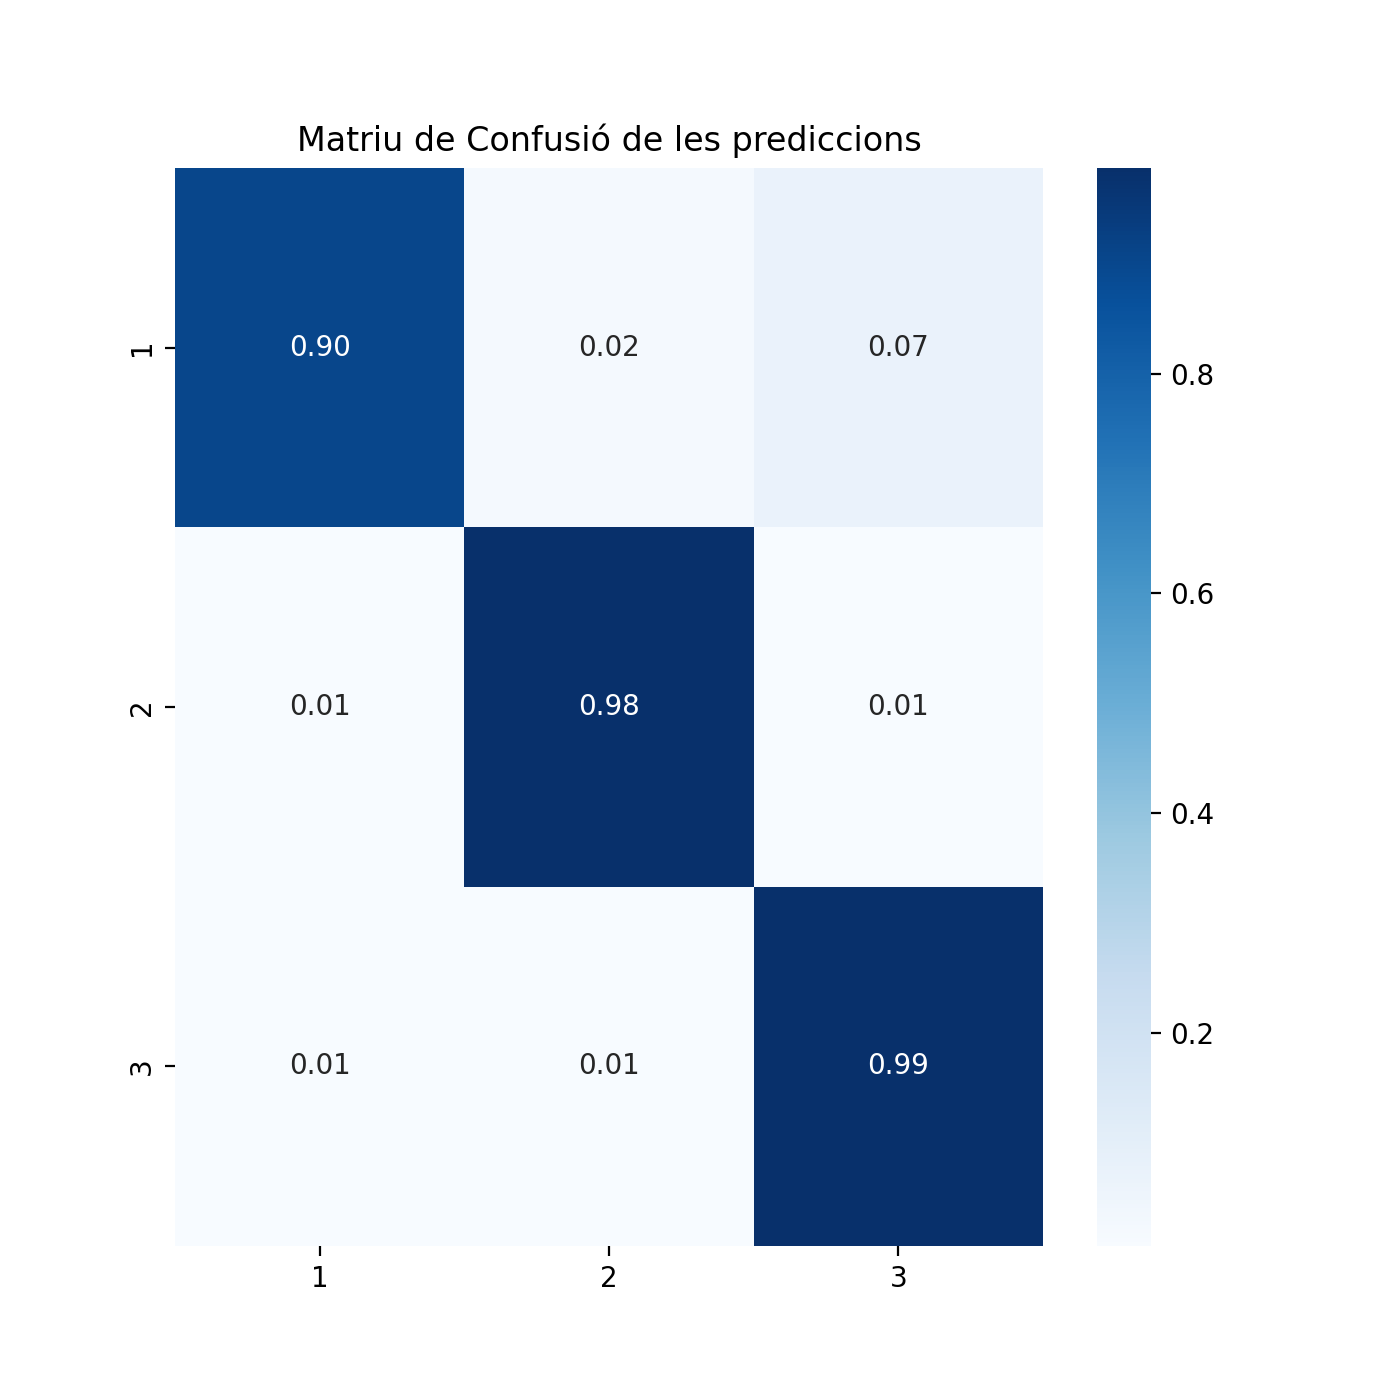

In [23]:
class_names = np.array(['1', '2', '3'])
plt.figure(figsize=(7,7))
y_pred = RF.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm =confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Matriu de Confusió de les prediccions')
plt.show()
plt.savefig('validation_HC.png')